# Ecommerce Landing Page A/B Testing

## Introduction
![images](https://www.leadpages.com/_next/image?url=https%3A%2F%2Fcdn.sanity.io%2Fimages%2F1ux2e04i%2Fproduction%2Ffd589b7e2d13df423596040b64792a6767bebe5e-1580x828.png%3Fauto%3Dformat&w=1920&q=75)
*[Source Images](https://www.leadpages.com/blog/ab-testing-split-testing)*


A/B testing (also known as bucket testing, split-run testing, or split testing) is a user experience research method. A/B tests consist of a randomized experiment that usually involves two variants (A and B), although the concept can be also extended to multiple variants of the same variable. It includes application of statistical hypothesis testing or "two-sample hypothesis testing" as used in the field of statistics. [wikipedia](https://en.wikipedia.org/wiki/A/B_testing)

Here, we'll use an e-commerce landing page for A/B testing.  The goal of e-commerce's landing page development is to increase sales. And how many users who "convert" who decide to pay for the company's product.  Dataset from [kaggle](https://www.kaggle.com/datasets/putdejudomthai/ecommerce-ab-testing-2022-dataset1)

## 1. Import Data

In [3]:
# Package/library to data manipulation
import pandas as pd
import numpy as np

# Package/library to visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('ab_data.csv')
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


- The data have some variable (`user_id`, `time_stamp`, `group`, `landing_page`, `converted`)
- `group` : the `control` group represents the original version, while the `treatment` group is exposed to the modified version to evaluate the impact of the changes.
- `landing_page` :  Compare the old page and the new page to statistically test whether the landing page redesign has a significant impact on revenue.
- `converted` : The `converted` variable is 1 if the user converted (e.g., made a purchase), and 0 if they did not.

In [5]:
# data size
data.shape

(294480, 5)

- There're 294,480 data entries

Verify whether the `user_id` variable contains duplicate data. Because in A/B testing every user must be unique

In [6]:
data.duplicated(['user_id']).sum()

3895

- We found 3,895 users with duplicate entries
- We selected only the first row for each user.

In [7]:
df = data.drop_duplicates(subset='user_id', keep='first')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

- There's no missing values in data entries

In [10]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


At this stage, we need to verify whether the `treatment ` group received the `old landing page` and the `control` group received the new one. Data collection systems can sometimes encounter errors that assign users to the wrong group, so it's important to ensure that each user was shown the correct landing page based on their assigned group.


The treatment group is expected to be shown the new landing page, whereas the control group should see the old landing page version.

Check for incorrect group
- Group: `Treatment`
- Landing Page: `Old Page`

In [11]:
# Check mismatched groups and landing pages
group_name = 'treatment'
landing_page_name = 'old_page'

# group condition
condition_group = df['group'] == group_name
condition_page = df['landing_page'] == landing_page_name

# data selection
data_salah1 = df[condition_group & condition_page]

In [12]:
data_salah1.head()

,user_id,timestamp,group,landing_page,converted
308,857184,34:59.8,treatment,old_page,0
327,686623,26:40.7,treatment,old_page,0
357,856078,29:30.4,treatment,old_page,0
685,666385,11:54.8,treatment,old_page,0
713,748761,47:44.4,treatment,old_page,0


In [13]:
row_data_salah1 = data_salah1.index
row_data_salah1

Index([   308,    327,    357,    685,    713,    776,    889,   1037,   1106,
         1376,
       ...
       267721, 268031, 269942, 272110, 272930, 274590, 282645, 285987, 286353,
       287469],
      dtype='int64', length=1038)

Check for incorrect group
- Group: `Control`
- Landing Page: `New Page`

In [14]:
# Check mismatched groups and landing pages
group_name = 'control'
landing_page_name = 'new_page'

# group condition
condition_group = df['group'] == group_name
condition_page = df['landing_page'] == landing_page_name

# data selection
data_salah2 = df[condition_group & condition_page]

In [15]:
data_salah2.head()

,user_id,timestamp,group,landing_page,converted
22,767017,58:15.0,control,new_page,0
240,733976,11:16.4,control,new_page,0
490,808613,44:01.3,control,new_page,0
846,637639,09:52.7,control,new_page,1
850,793580,25:33.7,control,new_page,1


In [16]:
row_data_salah2 = data_salah2.index
row_data_salah2

Index([    22,    240,    490,    846,    850,    988,   1198,   1354,   1474,
         1877,
       ...
       274230, 274434, 275142, 276229, 276876, 277083, 277283, 281176, 281593,
       282950],
      dtype='int64', length=1006)

- join all the wrong row data

In [17]:
row_data_salah = np.hstack([row_data_salah1, row_data_salah2])
row_data_salah

array([   308,    327,    357, ..., 281176, 281593, 282950], dtype=int64)

In [18]:
data_clean = data.drop(index=row_data_salah)

data_clean.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


- drop the wrong data

In [19]:
data_clean.shape

(292436, 5)

In [20]:
data_control = data_clean[data_clean['group'] == 'control']
data_control.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
4,864975,52:26.2,control,old_page,1
5,936923,20:49.1,control,old_page,0
7,719014,48:29.5,control,old_page,0


- Now, the data is clean

## 2. Find the number of users, the number of conversions, and the conversion rate

In this section, we will fill in the table

<center>

|Group|Total Users|Count Converted|Conversion Rate|
|:--|:--:|:--:|:--:|
|Control|-|-|-|
|Treatment|-|-|-|

</center>

To find that, we must first filter the data based on their group.

In [21]:
data_treatment = data_clean[data_clean['group'] == 'treatment']
data_treatment.head()

,user_id,timestamp,group,landing_page,converted
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
6,679687,26:46.9,treatment,new_page,1
8,817355,58:09.0,treatment,new_page,1
9,839785,11:06.6,treatment,new_page,1


- Find the total number of users in each group

In [22]:
n_control = data_control.shape[0]
n_control

146196

In [23]:
n_treatment = data_treatment.shape[0]
n_treatment

146240

In [24]:
# Total users converted in the control group

# Find data of converted users in the control group
data_control_convert = data_control[data_control['converted'] == 1]

# Calculate how many users converted
n_control_convert = data_control_convert.shape[0]

n_control_convert

17601

In [25]:
# Total users converted in the treatment group

# Find data of converted users in the treatment group
data_treatment_convert = data_treatment[data_treatment["converted"] == 1]

# Calculate how many users converted
n_treatment_convert = data_treatment_convert.shape[0]

n_treatment_convert

17374

In [26]:
cr_control = n_control_convert / n_control
cr_control

0.12039317081178691

In [27]:
cr_treatment = n_treatment_convert / n_treatment
cr_treatment

0.118804704595186

- Now, we can complete the table

<center>

|Group|Total Users|Count Converted|Conversion Rate|
|:--|:--:|:--:|:--:|
|Control|146196|17601|0.120|
|Treatment|146240|17374|0.118|

</center>

C:\Users\HP\AppData\Local\Temp\ipykernel_13440\3996119135.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)


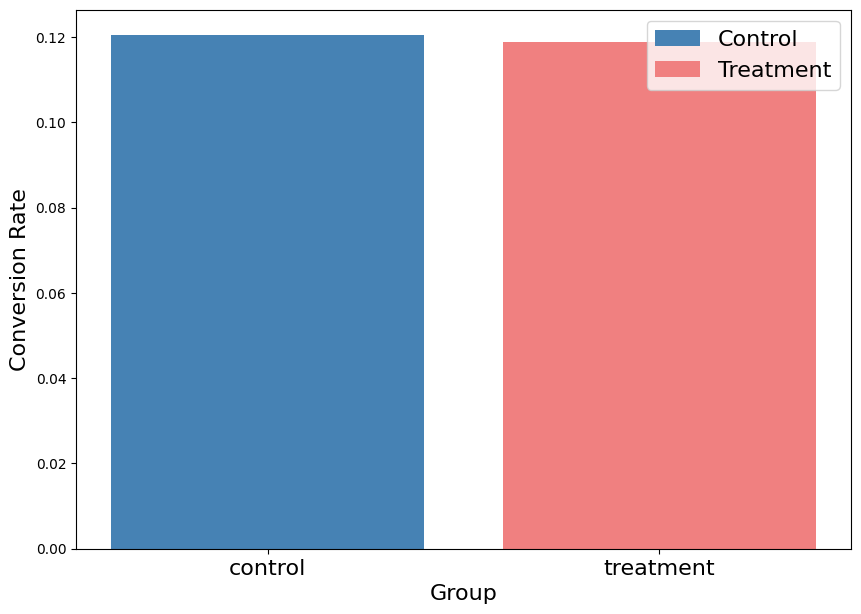

In [28]:
# Visualization of the conversion rate comparison for each variant
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Making plot
ax.bar("control", cr_control, color="steelblue", label="Control")
ax.bar("treatment", cr_treatment, color="lightcoral", label="Treatment")

# Styling plot
ax.set_ylabel("Conversion Rate", fontsize=16)
ax.set_xlabel("Group", fontsize=16)
ax.set_xticklabels(labels=["control", "treatment"], fontsize=16)
ax.legend(fontsize=16)
plt.show()

The conversion rate for the Control group is slightly higher than that of the Treatment group. Specifically, the Control group has a conversion rate of 0.120 (12.0%) with 17,601 conversions out of 146,196 users, while the Treatment group has a conversion rate of 0.118 (11.8%) with 17,374 conversions out of 146,240 users.

Although the difference in conversion rates between the two groups is minimal (0.002 or 0.2 percentage points), the Control group performs marginally better in terms of user conversions. Further statistical testing (e.g., a z-test for proportions) would be required to determine whether this difference is statistically significant.

After obtaining the results above, we still cannot draw a conclusion on whether to use the new landing page or stick with the old one. Even though the difference in conversion rates is small, it's crucial to perform statistical testing to confirm whether the difference between the two groups is truly statistically insignificant

## 3. Statistic Test

In [29]:
# Import library
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [30]:
# count convert & total observation
count_convert = [n_treatment_convert,n_control_convert]
count_observation = [n_treatment,n_control]

In [31]:
# Make alternative
alternative_option = "larger"

In [32]:
z_stat, p_value = proportions_ztest(count = count_convert,
                                    nobs = count_observation,
                                    alternative = alternative_option)

print(f"Z stats : {z_stat:.4f}")
print(f"P-value : {p_value:.4f}")

Z stats : -1.3236
P-value : 0.9072


In [33]:
cr_treatment - cr_control

-0.0015884662166009145

In [ ]:
# Additional 
# We can calculate the relative effect which shows how big the percentage increase or decrease in the conversion rate of the treatment is compared to the control.
relative_effect = (cr_treatment - cr_control)/cr_control * 100

print(f"relatife effect = {relative_effect:.3} %")

relatife effect = -1.32 %


In [ ]:
# From p-value
alpha = 0.05        # confidence level

# Making decision based p_value dan alpha
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Fail to Reject Null Hypothesis


In [36]:
import scipy.stats as stats
z_critical = stats.norm.ppf(1 - alpha)

z_critical

1.6448536269514722

In [ ]:
# From z-statistics
# Make decision based on z_critical and alpha
if z_stat > z_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Fail to Reject Null Hypothesis


### Visualization

- we visualization our result statistic test

In [ ]:
import scipy.stats as stats

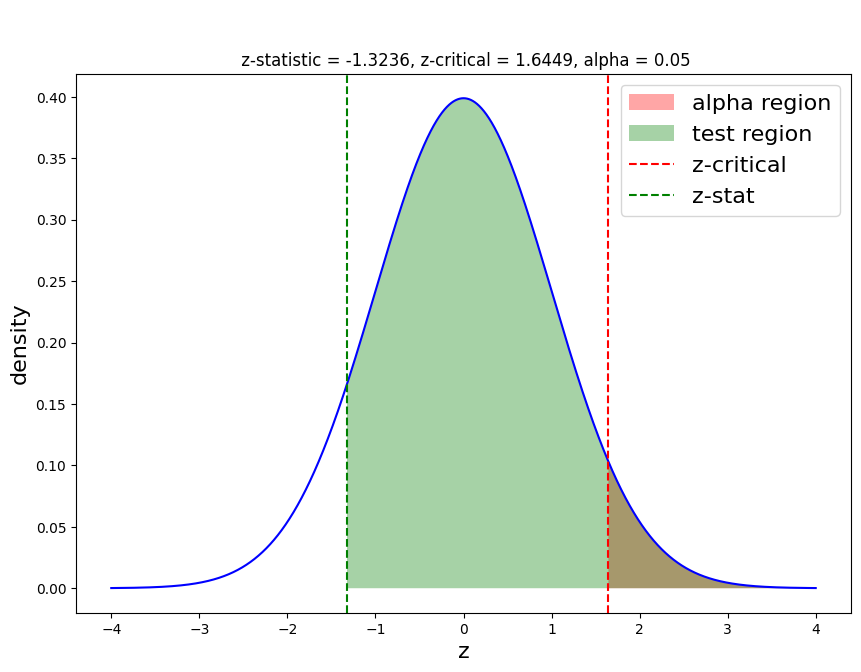

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot distribusi sample
x_sample = np.arange(-4., 4., 0.001)
y_sample = stats.norm.pdf(x_sample, 0, 1)
ax.plot(x_sample, y_sample,
        color = "blue")

# Plot region from alpha (region from reject H0)
x_alpha = np.arange(z_critical, 4., 0.001)
y_alpha = stats.norm.pdf(x_alpha)
ax.fill_between(x = x_alpha,
                y1 = y_alpha,
                facecolor = "red", 
                alpha = .35,
                label = "alpha region")


# Plot region from sampel
x_test = np.arange(z_stat, 4., 0.001)
y_test = stats.norm.pdf(x_test)
ax.fill_between(x = x_test,
                y1 = y_test,
                facecolor = "green", 
                alpha = .35,
                label = "test region")


# Plot vertical line alpha
ax.axvline(z_critical, 
           color = "red",
           linestyle = "--",
           label = "z-critical")

# Plot vertical line test
ax.axvline(z_stat, 
           color = "green",
           linestyle = "--",
           label = "z-stat")

# Styling plot
ax.set_xlabel("z", fontsize=16)
ax.set_ylabel("density", fontsize=16)

plt.title(f'\n\n z-statistic = {np.round(z_stat, 4)}, z-critical = {np.round(z_critical,4)}, alpha = {alpha}')
plt.legend(fontsize=16)
plt.show()

- Based on the graph, the test statistic (z-statistic = -1.3236) lies to the left of the normal distribution and does not exceed the z-critical value (z-critical = 1.6449)
- Since the z-statistic falls within the acceptance region (green), we fail to reject the null hypothesis.
- At a significance level of 0.05, there is insufficient evidence to conclude that the tested effect or difference is statistically significant.

## Conclusion
- The difference in conversion rates is not statistically significant.
- So, we can say The new landing page does not provide sufficient statistical evidence that it significantly increases revenue.